In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = data.drop(columns = ['target'])

In [5]:
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=40)

In [9]:
print(X_train.shape)

(242, 13)


In [10]:
print(X_test.shape)

(61, 13)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.ensemble import StackingClassifier

In [16]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt', GradientBoostingClassifier())
]

In [19]:
model = StackingClassifier(estimators= estimators, final_estimator = LogisticRegression())

In [20]:
model.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [24]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7868852459016393

## OOb Score

In [27]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [31]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


In [32]:
rf = RandomForestClassifier(oob_score=True)

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [41]:
# training score
rf.score(X_train,y_train)

1.0

In [34]:
rf.oob_score_

0.8181818181818182

In [38]:
y_pred1 = rf.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred1)

0.8032786885245902

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [45]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [46]:
y

array([0, 1, 0, 1, 0])

In [51]:
DTC = DecisionTreeClassifier()

In [52]:
DTC.fit(X,y)

DecisionTreeClassifier()

In [53]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

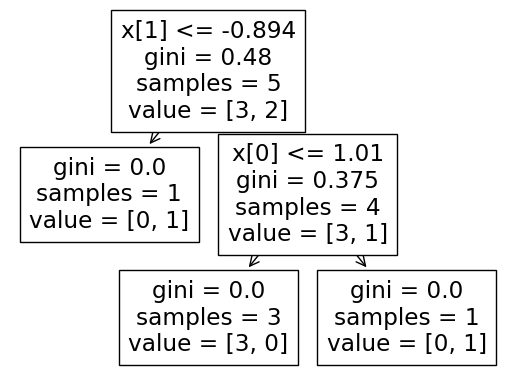

In [54]:
plot_tree(DTC)

In [55]:
DTC.feature_importances_

array([0.625, 0.375])

In [59]:
RFC = RandomForestClassifier(n_estimators=2)

In [60]:
RFC.fit(X, y)

RandomForestClassifier(n_estimators=2)

In [61]:
RFC.feature_importances_

array([0.86111111, 0.13888889])

In [62]:
RFC.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1995099352)

In [63]:
RFC.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=1339973472)

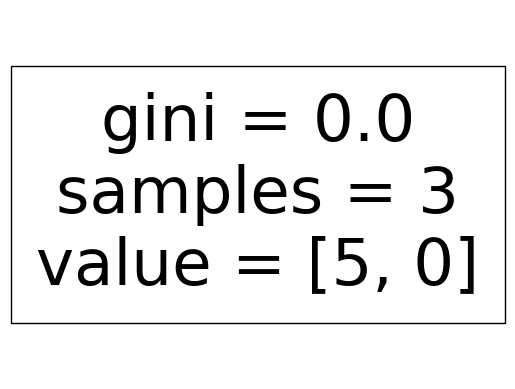

In [66]:
for i in range(0,2):
    plot_tree(RFC.estimators_[i])
    

[Text(0.3333333333333333, 0.875, 'x[0] <= -0.79\ngini = 0.48\nsamples = 4\nvalue = [2, 3]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.5, 0.625, 'x[1] <= 0.285\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.335\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

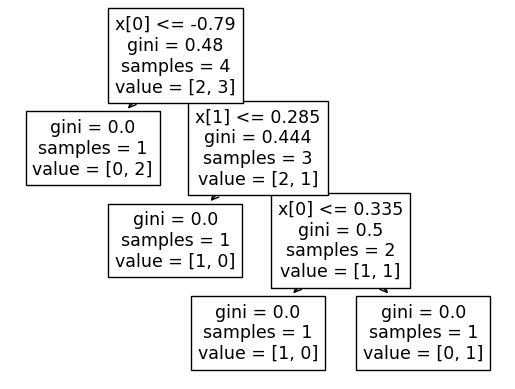

In [67]:
plot_tree(RFC.estimators_[0])

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]')]

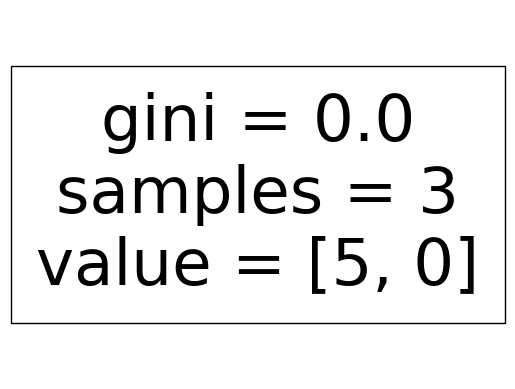

In [68]:
plot_tree(RFC.estimators_[1])